# BigArtm Experiments

Данный ноутбук показывает возможности интерфейса для создания экспериментов над тематическими моделями в библиотеке BigArtm.

In [2]:
from artm_experiments import Experiment, Pool, OptimizationTopicsFilter
from artm import *
import glob
import os
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Как обычно создаем нужную нам модель, над которой и будем проводить эксперименты.

In [3]:
batch_vectorizer = BatchVectorizer(data_path='kos', data_format='batches')

# эта функция создает новую модель со случайным начальным seed'ом
def create_model():
    model_artm = ARTM(num_topics=50,
                      scores=[PerplexityScore(name='PerplexityScore',
                                              use_unigram_document_model=False,
                                              dictionary_name='dictionary')],
                      regularizers=[SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.2),
                                    DecorrelatorPhiRegularizer(name='DecorrelatorPhi', tau=2.5e+5)])
    
    if not os.path.exists('kos/dictionary.dict'):
        model_artm.gather_dictionary(dictionary_target_name='dictionary', 
                                     data_path='kos', vocab_file_path='vocab.kos.txt')
        model_artm.save_dictionary(dictionary_name='dictionary', dictionary_path='kos/dictionary.dict')
    else:
        model_artm.load_dictionary(dictionary_name='dictionary', dictionary_path='kos/dictionary.dict')
    model_artm.initialize(dictionary_name='dictionary', seed=np.random.randint(1000000))

    return model_artm

Теперь создаем эксперимент, используя оптимизационную выпуклую оболчку. Затем 5 раз создаем тематические модели и передаем созаднные темы в наш класс эксперимента. Для понимания процесса обработки тем можно нарисовать гистограммы расстояний тем до выпуклой оболчки. 

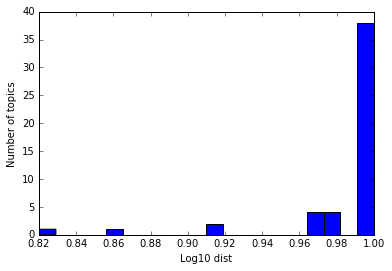

50


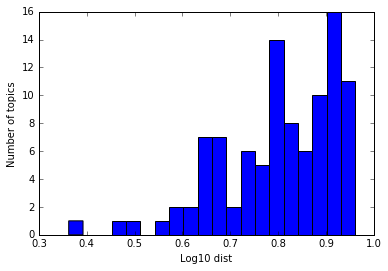

97


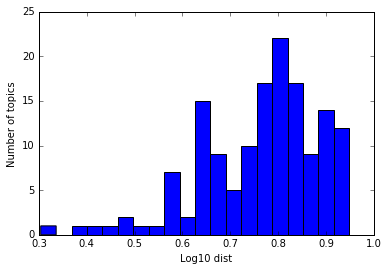

139


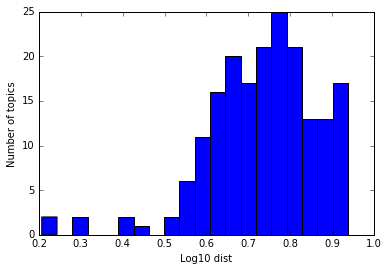

179


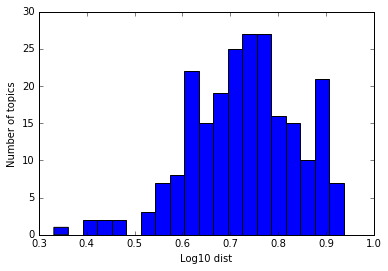

219


In [6]:
exp = Experiment(Pool(topics_filter=OptimizationTopicsFilter(eps=0.55, verbose=False), 
                      save_topics=True))
for i in xrange(5):
    model_artm = create_model()
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=15, num_document_passes=1)
    exp.collect_topics(model_artm.get_phi(), model_artm.get_theta())
    vals, bins = exp.topics_pool.topics_filter.plot_hist()
    print exp.topics_pool.get_basic_topics_count()

В конце выведем отфильтрованные темы.

In [7]:
exp.show_basic_topics()

topic249 | [u'theme' u'strongly' u'grassroots' u'counties' u'corps']
topic209 | [u'feb' u'research' u'rep' u'makes' u'means']
topic64 | [u'industrial' u'settled' u'passion' u'nod' u'soros']
topic167 | [u'rnc' u'smith' u'traffic' u'oregon' u'actual']
topic182 | [u'murkowski' u'keyes' u'barbara' u'tony' u'lisa']
topic3 | [u'employee' u'indictment' u'teachers' u'austin' u'mcgreevey']
topic14 | [u'citizen' u'matches' u'egon' u'casts' u'kerr']
topic67 | [u'cbs' u'weekend' u'combat' u'duty' u'served']
topic7 | [u'operations' u'coalition' u'insurgents' u'command' u'combat']
topic199 | [u'language' u'ideas' u'moores' u'substantial' u'providing']
topic233 | [u'handling' u'hughes' u'divided' u'karen' u'sees']
topic123 | [u'industrial' u'feelings' u'betting' u'salvador' u'banner']
topic112 | [u'keever' u'seemann' u'map' u'gerlach' u'rowland']
topic169 | [u'threatened' u'berg' u'factor' u'lists' u'letters']
topic59 | [u'club' u'murkowski' u'lisa' u'indian' u'slot']
topic127 | [u'opinion' u'favorab

Также иногда полезно посмотреть на все темы, которые использовались в эксперименте.

In [8]:
exp.show_all_topics(sort_by_closest_topic=True)

topic0 | [u'images' u'chain' u'stealing' u'frost' u'dallas'] | topic0
topic1 | [u'english' u'muslims' u'wink' u'wmds' u'bombs'] | topic1
topic10 | [u'nag' u'funds' u'matching' u'oneill' u'inflation'] | topic10
topic101 | [u'graham' u'posting' u'face' u'announcement' u'cheneys'] | topic101
topic102 | [u'hurry' u'deserved' u'cells' u'rooms' u'guild'] | topic102
topic103 | [u'humphreys' u'tulsa' u'burt' u'parity' u'roosevelt'] | topic103
topic104 | [u'morrison' u'forget' u'matching' u'cash' u'club'] | topic104
topic105 | [u'josh' u'living' u'threatened' u'scientists' u'species'] | topic105
topic106 | [u'boxer' u'dreier' u'schwarzenegger' u'reserves' u'adjust'] | topic106
topic108 | [u'richard' u'forces' u'talking' u'coalition' u'hussein'] | topic108
topic109 | [u'carry' u'caught' u'targetting' u'firefighters' u'surface'] | topic109
topic110 | [u'approve' u'cbs' u'kerryedwards' u'bushcheney' u'pat'] | topic110
topic111 | [u'courts' u'divorce' u'houston' u'ruled' u'justices'] | topic111
top

И оценить расстояния между темами.

In [9]:
exp.topics_pool.get_dist_between_topics('topic214', 'topic170')

0.2902280390262604

Далее для обработки тем мы воспользуемся навигатором. Чтобы импортировать ранее созданные темы в него, нужно выбрать размер батча, который предстоит оценить асессорам. 

In [10]:
exp.show_next_topics_batch(10)

topic249:
[u'theme' u'strongly' u'grassroots' u'counties' u'corps']
topic209:
[u'feb' u'research' u'rep' u'makes' u'means']
topic64:
[u'industrial' u'settled' u'passion' u'nod' u'soros']
topic167:
[u'rnc' u'smith' u'traffic' u'oregon' u'actual']
topic182:
[u'murkowski' u'keyes' u'barbara' u'tony' u'lisa']
topic3:
[u'employee' u'indictment' u'teachers' u'austin' u'mcgreevey']
topic14:
[u'citizen' u'matches' u'egon' u'casts' u'kerr']
topic67:
[u'cbs' u'weekend' u'combat' u'duty' u'served']
topic7:
[u'operations' u'coalition' u'insurgents' u'command' u'combat']
topic199:
[u'language' u'ideas' u'moores' u'substantial' u'providing']


Выбрав батч, далее мы сохраняем нужные данные в навигатор.

In [ ]:
exp.save_dataset_to_navigator('kos')

In [ ]:
exp.save_next_topics_batch_to_navigator(10, 'kos')

И после оценок асессоров мы можем загрузить их обратно и свободно работать с ними.

In [ ]:
exp.load_assessments_from_navigator()

In [ ]:
exp.show_assessments()